In [21]:
import skorch
import torch

# Getting the data

In [22]:
from sklearn.datasets import load_iris
import torch

iris=load_iris()
X=iris.data
y=iris.target

X = torch.tensor(X).float()

# Making the model

In [23]:

import torch.nn as nn       
import torch.nn.functional as F 

class IrisClassifier(nn.Module):
    
    def __init__(self):
        super(IrisClassifier, self).__init__()
        self.layer1 = nn.Linear(4, 120)
        self.layer2 = nn.Linear(120, 64)
        self.layer3 = nn.Linear(64, 12)
        self.layer4 = nn.Linear(12, 3)
        self.ReLU = nn.ReLU()
        
        
    def forward(self, x):
        z = self.ReLU(self.layer1(x))
        z = self.ReLU(self.layer2(z))
        z = self.ReLU(self.layer3(z))
        z = self.ReLU(self.layer4(z))
        z = F.softmax(z, dim=1)
        return z

In [24]:
# Found here : https://www.kaggle.com/code/mohitchaitanya/simple-iris-dataset-classification-using-pytorch

class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
            super(NeuralNetworkClassificationModel,self).__init__()
            self.input_layer    = nn.Linear(input_dim,128)
            self.hidden_layer1  = nn.Linear(128,64)
            self.output_layer   = nn.Linear(64,output_dim)
            self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [25]:
# Found here : https://janakiev.com/blog/pytorch-iris/

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Calling the fit function

In [26]:
from skorch import NeuralNetClassifier
import torch

net = NeuralNetClassifier(
    NeuralNetworkClassificationModel(4,3),
    max_epochs=100,
    lr=1e-3,
    batch_size=64,
    optimizer=torch.optim.SGD,
    criterion=torch.nn.CrossEntropyLoss,
    
)

net.fit(X,y=y)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.1837       0.3333        1.1754  0.0048
      2        1.1758       0.3333        1.1676  0.0044
      3        1.1685       0.3000        1.1603  0.0055
      4        1.1617       0.1667        1.1536  0.0041
      5        1.1554       0.1000        1.1473  0.0037
      6        1.1496       0.0333        1.1415  0.0048
      7        1.1441       0.0000        1.1362  0.0050
      8        1.1392       0.0333        1.1311  0.0109
      9        1.1345       0.1333        1.1264  0.0121
     10        1.1302       0.3000        1.1219  0.0238
     11        1.1260       0.3333        1.1177  0.0191
     12        1.1221       0.3333        1.1138  0.0237
     13        1.1185       0.3333        1.1101  0.0080
     14        1.1150       0.3333        1.1065  0.0041
     15        1.1117       0.3333        1.1031  0.0051
     16        1.1086       0.3

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=NeuralNetworkClassificationModel(
    (input_layer): Linear(in_features=4, out_features=128, bias=True)
    (hidden_layer1): Linear(in_features=128, out_features=64, bias=True)
    (output_layer): Linear(in_features=64, out_features=3, bias=True)
    (relu): ReLU()
  ),
)

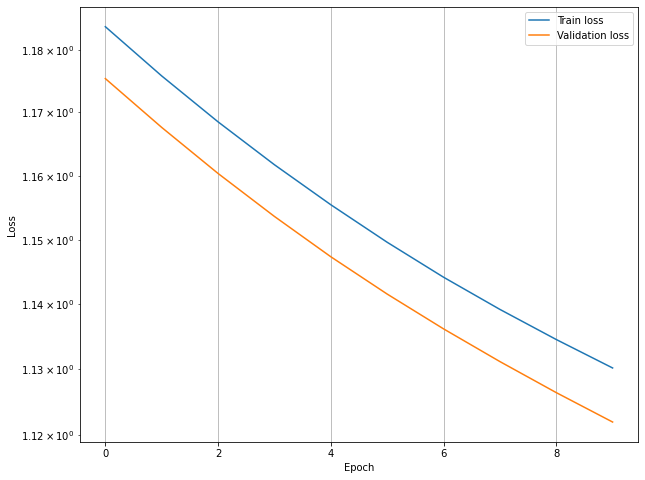

In [27]:
import matplotlib.pyplot as plt


val_loss=[]
train_loss=[]
for i in range(10):
    val_loss.append(net.history[i]['valid_loss'])
    train_loss.append(net.history[i]['train_loss'])
    
plt.figure(figsize=(10,8))
plt.semilogy(train_loss, label='Train loss')
plt.semilogy(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()    